In [17]:
import pandas as pd
import numpy as np

# 1. 단일 표본 t검정

- 그룹의 평균이 기준 값과 차이가 있는 지를 확인
- 단일 표본 t검정은 해당 변수가 정규 분포를 따라야 하므로, kolmogorov-smornov나 shapiro-wilk를 사용한 정규성 검정이 선행되어야 함
- 보통 샘플 수가 많을수록 정규성을 띌 가능성이 높으므로, 샘플 수가 부족한 경우에만 정규성 검정을 수행한 뒤, 정규성을 띄지 않는다고 판단되면 비모수적 방법인 부호 검정이나 윌콕슨 부호 순위 검정을 수행함

#### 정규성 검정: kolmogorov-smornov(ks test)

- 관측한 샘플들이 특정 분포를 따르는지 확인하기 위한 검정 방법
- 특정 분포를 따른다면 나올 것이라 예쌍되는 값과 실제 값의 차이가 유의한지를 확인하는 방법으로, 해당 특정 분포를 정규 분포로 설정하여 정규성 검정에도 사용함

In [2]:
with open('성인여성_키_데이터.txt', 'r') as f:
    data = f.read().split('\n')
    data = list(map(float, data))
    
print(data)

[150.27, 142.94, 160.99, 157.48, 153.46, 137.5, 154.94, 159.51, 171.87, 143.69, 153.65, 160.25, 153.07, 154.42, 141.21, 154.17, 162.56, 164.44, 172.36, 141.51, 169.4, 167.97, 170.26, 157.8, 167.61]


In [3]:
# 정규성 검정

from scipy.stats import *

kstest(data, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

- pvalue가 0.0 < 0.05이므로 정규성을 띔

In [4]:
# 단일 표본 t검정
## 귀무가설: data의 평균 == 163

print(ttest_1samp(data, 163))     # data, popmean

Ttest_1sampResult(statistic=-2.979804412662668, pvalue=0.006510445335847954)


- pvalue가 0.006 < 0.05이므로 귀무가설(data의 평균 == 163) 기각
- statistic(통계량)이 음수이므로 data의 평균 < 163 임

- statistic(통계량) > 0 (양수)이면 data의 평균 > popmean
- statistic(통계량) < 0 (음수)이면 data의 평균 < popmean

- pvalue < 0.05이면 data의 평균 != popmean

In [6]:
# 윌콕슨 부호 - 순위 검정

from scipy.stats import *

wilcoxon(data)

WilcoxonResult(statistic=0.0, pvalue=5.960464477539063e-08)

- 단일 표본 t검정과 결과 해석은 같음
- 단, popmean은 data의 중위수로 설정됨

# 2. 독립 표본 t검정

- 서로 다른 두 그룹의 데이터 평균 비교

- 선행조건
    - 독립성: 두 그룹은 서로 독립적이어야 함
    - 정규성: 데이터는 정규분포를 따라야 함(정규성을 따르지 않으면 비모수 검정인 mann-whitney 검정 수행)
    - 등분산성: 두 그룹의 데이터에 대한 분산이 같아야 함
        - levene의 등분산 검정: pvalue < 0.05이면 분산이 다르다고 판단
        - 분산이 같은지 다른지에 따라 사용하는 통계량이 달라지므로, 설정을 달리하면 됨

In [12]:
df1 = pd.read_csv('반별_점수_type1.csv', encoding = 'cp949')
df1.head()

,반,점수
0,A,73
1,A,69
2,A,71
3,A,71
4,A,73


In [13]:
group_A = df1['점수'].loc[df1['반'] == 'A'].values
group_B = df1['점수'].loc[df1['반'] == 'B'].values

print(group_A)
print(group_B)

[73 69 71 71 73 67 73 69 62 74 68 66 70 82 70 65 76 73 58 81]
[63 56 73 61 55 77 75 65 61 55]


In [14]:
# kstest를 이용한 정규성 검정

print(kstest(group_A, 'norm'))
print(kstest(group_B, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


- 두 그룹 모두 pvalue가 0.0 < 0.05이므로 정규분포를 나타냄

In [15]:
# 등분산 검정(levene검정)

levene(group_A, group_B)

LeveneResult(statistic=2.033067087400979, pvalue=0.164964086222101)

- pvalue가 0.16 > 0.05이므로 샘플 간 분산이 같음 = 등분산을 나타냄

- pvalue < 0.05이면 샘플 간 분산이 같지 않다고 판단

In [18]:
np.var(group_A, None, ddof = 1)

32.26052631578948

In [19]:
# 독립 표본 t검정

print(ttest_ind(group_A, group_B, equal_var = True))     # equal_var = 등분산성을 만족하는지 여부

Ttest_indResult(statistic=2.5128526794964134, pvalue=0.01801095352893767)


- pvalue가 0.018 < 0.05이므로 A와 B간에 차이가 존재함(평균이 같지 않음)
- statistic > 0이므로 A의 평균이 더 큼

In [21]:
# mann-whitneyu 검정

mannwhitneyu(group_A, group_B)

MannwhitneyuResult(statistic=144.5, pvalue=0.052214058504523056)

- pvalue < 0.05이면 a와 b의 평균이 같지 않다고 판단

#### 다른 포맷의 데이터일 경우

In [22]:
df2 = pd.read_csv('반별_점수_type2.csv', encoding = 'cp949')
df2

,A반,B반
0,73,63.0
1,69,56.0
2,71,73.0
3,71,61.0
4,73,55.0
5,67,77.0
6,73,75.0
7,69,65.0
8,62,61.0
9,74,55.0


In [27]:
# a와 b의 길이가 달라서 결측이 발생할 수 있으므로, 결측을 제거한 뒤 각 컬럼을 group_a와 group_b에 저장함

group_a = df2['A반'].dropna().values
group_a

array([73, 69, 71, 71, 73, 67, 73, 69, 62, 74, 68, 66, 70, 82, 70, 65, 76,
       73, 58, 81], dtype=int64)

In [30]:
group_b = df2['B반'].values
group_b

array([63., 56., 73., 61., 55., 77., 75., 65., 61., 55., nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan])

In [29]:
group_b = df2['B반'].dropna().values
group_b

array([63., 56., 73., 61., 55., 77., 75., 65., 61., 55.])

# 3. 쌍체 표본 t검정

- 특정 실험 및 조치 등의 효과가 유의한지 확인
- 실험 전과 후의 측정값(x와 y)은 정규 분포를 따르지 않아도 무방함
- 측정값의 차이(d)는 정규성을 따라야 함

In [32]:
df = pd.read_csv('다이어트약_효과검증.csv')
df.head()

,다이어트전(kg),다이어트후(kg)
0,87.41,88.30
1,81.05,76.21
2,60.72,53.34
3,81.02,78.21
4,75.75,76.74


In [33]:
df.columns

Index(['다이어트전(kg)', '다이어트후(kg)'], dtype='object')

In [35]:
before = df['다이어트전(kg)']
after = df['다이어트후(kg)']

In [36]:
# 정규성 검정

from scipy.stats import *

kstest(after - before, 'norm')

KstestResult(statistic=0.7424620196514834, pvalue=7.04108433205159e-29)

- pvalue가 0에 매우 가까우므로 < 0.05이므로 정규성 따름

In [37]:
ttest_rel(before, after)

Ttest_relResult(statistic=9.70596986565785, pvalue=5.370404098342324e-13)

- pvalue가 0에 매우 가까우므로 < 0.05이므로 실험 전과 실험 후 간의 차이가 존재함(특정 실험의 효과가 존재함)
- statistic(d)가 9 > 0 (양수)이므로 양의 효과가 있음
- statistic(d) < 0 (음수)이면 음의 효과가 있음

# 4. 일원분산분석

- 셋 이상의 그룹 간 차이가 존재하는지를 확인하기 위한 가설 검정 방법
- 선행조건
    - 독립성: 모든 그룹은 서로 독립적이어야 함
    - 정규성: 모든 그룹의 데이터는 정규 분포를 따라야 함(그렇지 않으면 비모수적 방법인 kruskal-wallis h test를 수행)
    - 등분산성: 모든 그룹에 데이터에 대한 분산이 같아야 함(그렇지 않으면 비모수적 방법인 kruskal-wallis h test를 수행)
    
- 일원분산분석의 통계량 F = 집단 간 분산 / 집단 내 분산

- 사후분석: Tukey HSD test
    - 일원분산분석에서 두 그룹 a와 b간 차이가 유의한 지 파악하는 사후 분석 방법
    - 이 값이 유의수준보다 크면 두 차이가 유의함

In [39]:
df = pd.read_csv('지점별_일별판매량.csv', encoding = 'cp949')
df.head()

,일자,지점A,지점B,지점C
0,1,124,118,216
1,2,147,141,214
2,3,129,130,212
3,4,123,127,179
4,5,147,107,222


In [40]:
# 데이터 분할(결측이 포함되어 있을 수 있으므로 dropna 사용)

a = df['지점A'].dropna().values
b = df['지점B'].dropna().values
c = df['지점C'].dropna().values

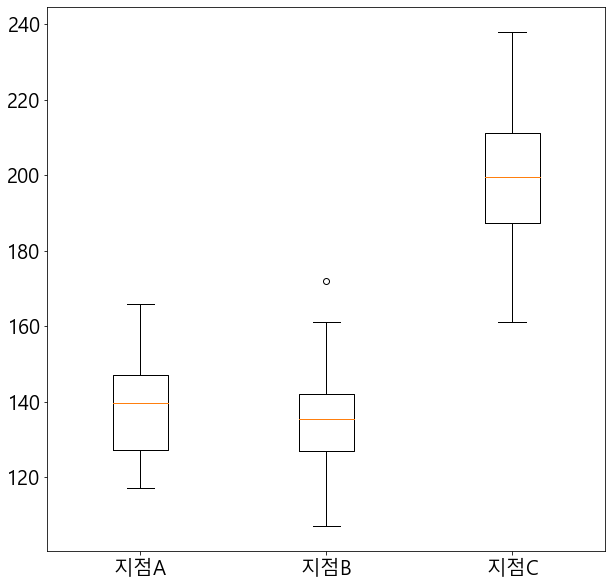

In [43]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (10, 10)

plt.boxplot([a, b, c])
plt.xticks([1, 2, 3], ['지점A', '지점B', '지점C']);

In [44]:
# 정규성 검정

from scipy.stats import *

print(kstest(a, 'norm'))
print(kstest(b, 'norm'))
print(kstest(c, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


- 세 그룹 모두 pvalue가 0.0 < 0.05이므로 정규성을 띔

In [45]:
# 일원분산분석

print(f_oneway(a, b, c))

F_onewayResult(statistic=178.43825416847133, pvalue=1.6337420285664805e-31)


- pvalue가 0에 매우 가까우므로 < 0.05이므로 a, b, c의 평균은 유의한 차이가 존재함(최소 하나의 그룹은 다른 그룹의 평균과 다름)

In [46]:
# 사후 분석

from statsmodels.stats.multicomp import pairwise_tukeyhsd

group = ['a'] * len(a) + ['b'] * len(b) + ['c'] * len(c)
data = a.tolist() + b.tolist() + c.tolist()

print(pairwise_tukeyhsd(data, group))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     a      b     -1.4   0.9 -10.5745  7.7745  False
     a      c  62.2333 0.001  53.0589 71.4078   True
     b      c  63.6333 0.001  54.4589 72.8078   True
----------------------------------------------------


- a ~ b는 reject가 false이므로 유의한 차이가 존재하지 않음
- a ~ c는 reject가 true이므로 유의한 차이가 존재
- b ~ c는 reject가 true이므로 유의한 차이가 존재

- 따라서, [a, b] / [c]로 데이터가 구분됨

# 5. 상관분석

- 두 연속형 변수 간에 어떠한 선형 관계를 가지는지 파악

#### 피어슨 상관 계수

- 두 변수 모두 연속형 변수일 때 사용하는 상관계수
- 상관계수가 1에 가까울수록 양의 상관관계가 강하다고 하며
- -1에 가까울수록 음의 상관관계가 강하다고 함
- 0에 가까울수록 상관관계가 약하다고 함

#### 스피어만 상관 계수

- 두 변수의 순위 사이의 단조 관련성을 측정하는 상관계수

In [47]:
df = pd.read_excel('일별_금은달러.xlsx')
df.head()

,일자,금값,은값,달러 환율
0,2020.08.07,78538.90,27.53,1188.5
1,2020.08.06,78009.22,28.39,1185.5
2,2020.08.05,77748.00,26.88,1188.0
3,2020.08.04,75873.57,26.01,1194.5
4,2020.08.03,75761.76,24.39,1195.7


In [49]:
df.sort_values(by = '일자', inplace = True)
df.head()

,일자,금값,은값,달러 환율
27,2020.06.30,68559.78,18.54,1203.0
26,2020.07.01,68941.28,18.13,1203.5
25,2020.07.02,68278.07,18.24,1199.0
24,2020.07.06,68269.27,18.50,1194.0
23,2020.07.07,68443.14,18.63,1197.0


In [50]:
df['일자'].iloc[::8]

27    2020.06.30
19    2020.07.13
11    2020.07.23
3     2020.08.04
Name: 일자, dtype: object

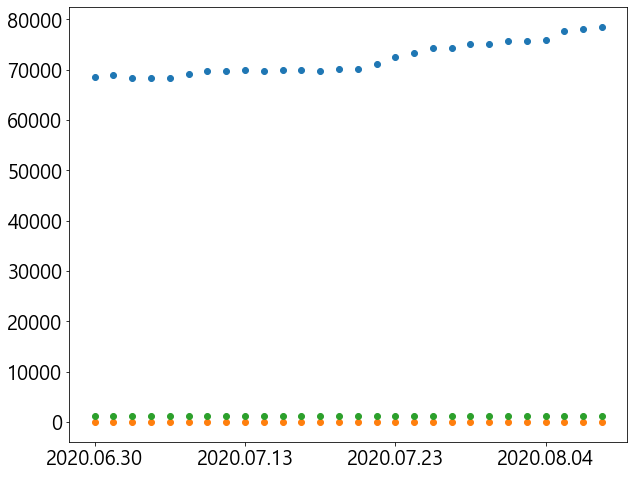

In [52]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (10, 8)

plt.scatter(df['일자'], df['금값'])
plt.scatter(df['일자'], df['은값'])
plt.scatter(df['일자'], df['달러 환율'])
plt.xticks(df['일자'].iloc[::8]);

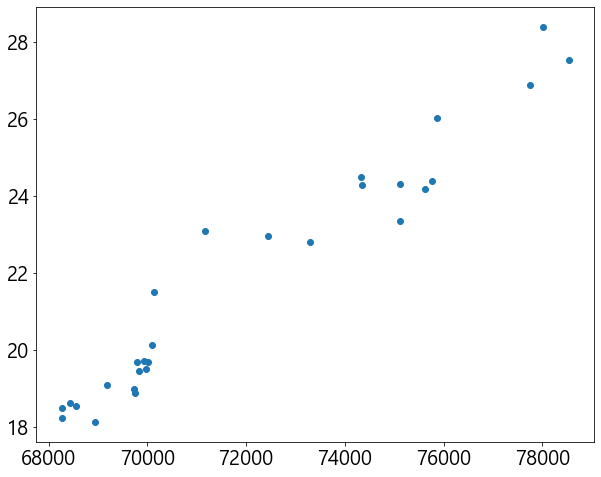

In [54]:
plt.scatter(df['금값'], df['은값']);

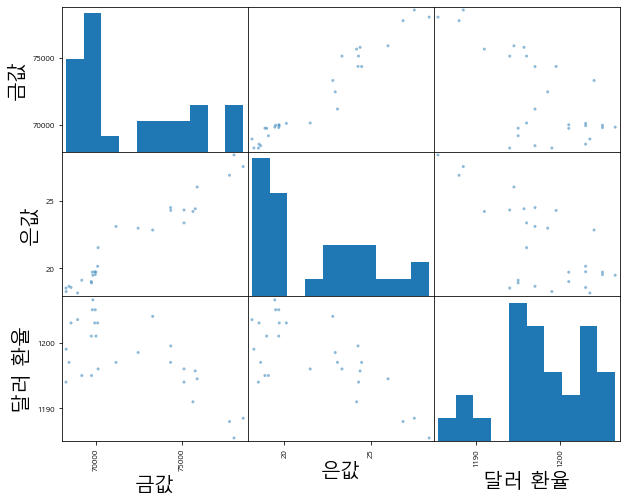

In [56]:
pd.plotting.scatter_matrix(df.drop('일자', axis = 1));

In [57]:
# 피어슨 상관계수

from scipy.stats import *
import itertools

target_columns = ['금값', '은값', '달러 환율']

for col1, col2 in itertools.combinations(target_columns, 2):
    result = pearsonr(df[col1], df[col2])
    print('{} ~ {}: coef: {}, pvalue: {}'.format(col1, col2, result[0], result[1]))

금값 ~ 은값: coef: 0.9718640116033496, pvalue: 7.508878356557318e-18
금값 ~ 달러 환율: coef: -0.6793266264341937, pvalue: 7.033325258452259e-05
은값 ~ 달러 환율: coef: -0.695456955620356, pvalue: 3.9890420619579605e-05


- coef로 나온 것이 statistics로 상관계수
- pvalue < 0.05이면 유의한 상관성이 있음


- 세 결과 모두 pvalue가 모두 0에 매우 가까우므로 < 0.05이므로 유의한 상관성이 있음
- 금값과 은값은 상관계수가 0.97이므로 양의 상관관계
- 금값과 달러환율은 상관계수가 -0.67이므로 음의 상관관계(금값이 증가하면 달러 환율은 떨어지는 추세)
- 은값과 달러환율은 상관계수가 -0.69이므로 음의 상관관계(은값이 증가하면 달러 환율은 떨어지는 추세)

In [58]:
# 스피어만 상관계수

from scipy.stats import *
import itertools

target_columns = ['금값', '은값', '달러 환율']

for col1, col2 in itertools.combinations(target_columns, 2):
    result = spearmanr(df[col1], df[col2])
    print('{} ~ {}: coef: {}, pvalue: {}'.format(col1, col2, result[0], result[1]))

금값 ~ 은값: coef: 0.9711235892228813, pvalue: 1.0481280432981455e-17
금값 ~ 달러 환율: coef: -0.5039075855936102, pvalue: 0.006257468267109452
은값 ~ 달러 환율: coef: -0.528106006718531, pvalue: 0.003869997604824081


- 결과 해석은 피어슨 상관계수와 동일

In [59]:
# 상관행렬: 컬럼 간 상관계수를 나타내는 행렬

df.drop('일자', axis = 1).corr(method = 'pearson')

,금값,은값,달러 환율
금값,1.000000,0.971864,-0.679327
은값,0.971864,1.000000,-0.695457
달러 환율,-0.679327,-0.695457,1.000000


In [60]:
df.drop('일자', axis = 1).corr(method = 'spearman')

,금값,은값,달러 환율
금값,1.000000,0.971124,-0.503908
은값,0.971124,1.000000,-0.528106
달러 환율,-0.503908,-0.528106,1.000000


# 6. 카이제곱 검정

- 두 범주형 변수가 서로 독립적인지 검정
- 교차 테이블(contingency table): 두 변수가 취할 수 있는 값의 조합의 출현 빈도를 나타냄
- 카이제곱 통계량: 기대값과 실제값의 차이가 클수록 통계량이 커지며, 통계량이 커질수록 귀무가설이 기각될 가능성이 높아짐(pvalue가 감소함)

In [61]:
df = pd.read_csv('성별에따른만족도.csv', encoding = 'cp949')
df.head()

,만족도,성별
0,불만족,남성
1,보통,여성
2,불만족,여성
3,보통,남성
4,만족,여성


In [62]:
# 교차 테이블 생성

cross_table = pd.crosstab(df['만족도'], df['성별'])
cross_table

성별,남성,여성
만족도,,
만족,50,40
보통,40,30
불만족,10,30


In [63]:
obs = cross_table.values
obs

array([[50, 40],
       [40, 30],
       [10, 30]], dtype=int64)

In [64]:
# 카이제곱검정

from scipy.stats import *

statistics, pvalue, dof, expected = chi2_contingency(obs)
print(statistics)
print(pvalue)

12.53968253968254
0.001892528960792166


- pvalue가 0.001 < 0.05이므로 두 변수 간 독립이 아님

In [65]:
# 기대값

pd.DataFrame(expected, columns = cross_table.columns, index = cross_table.index)

성별,남성,여성
만족도,,
만족,45.0,45.0
보통,35.0,35.0
불만족,20.0,20.0
